## Visualización de ingresos basados en las diferentes carreras universitarias

En el siguiente proyecto exploraremos como utilizar las herramientas de graficación que posee pandas, para
estudiar rápidamente los datos de manera visual y poder hallar patrones que proporcionan insights a nuestro
estudio estadístico.

Trabajaremos con un dataset sobre los resultados laborales de los estudiantes graduados de la universidad
entre 2000 y 2012. La data original fue entregada por la American Community Survey que es la encargada de
realizar las encuestas.

Cada fila del dataset representa diferentes especializaciones universitarias y contiene información en
diversidad de género, tasa de empleos, promedio salarial, algunas de las filas que se podrán encontrar en el
dataset son las siguientes:

* Rank - Rank por promedio de ingresos (el dataset esta ordenado por esta columna).
* Major_code - Código de la especialización.
* Major - Descripción de la especialización.
* Major_category - Categoría de la especialización.
* Total - Total de personas con esta especialización.
* Sample_size - Tamaño de la muestra (no ponderado) de tiempo completo.
* Men - Graduados del género masculino.
* Women - Graduados del género femenino.
* ShareWomen - Porcentaje de mujeres del total.
* Employed - Número de egresados empleados.
* Median - Promedio salarial de empleos tiempo - completo, trabajadores durante el año.
* Low_wage_jobs - Egresados en trabajos de bajo ingresos.
* Full_time - Egresados empleados con trabajos de 35 horas o mas.
* Part_time - Egresados con empleos con menos de 35 horas.

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Convertiremos el dataset en un pandas DataFrame para realiza nuestros análisis
recent_grads = pd.read_csv("recent-grads.csv")
print("________First row from recent grads_________","\n")
print(recent_grads.iloc[0,:], "\n")
print("_________________First five rows from recent grads_____________________","\n")
print(recent_grads.head(),"\n")
print("___________________Last five rows from recent grads____________________","\n")
print(recent_grads.tail(),"\n")
print("_________________________Recent grads Description________________________", "\n")
print(recent_grads.describe(),"\n")
print("____________________Column Info__________________", "\n")
print(recent_grads.info())

________First row from recent grads_________ 

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                    

In [3]:
# Vamos a determinar la cantidad de datos que tenemos, vamos a derterminar el número de columnas y de filas
rows, cols = recent_grads.shape
print("Existen {} filas y {} columnas".format(rows, cols))


Existen 173 filas y 21 columnas


In [4]:
# Ahora vamos a eliminar los missing values que puedan existir en la data para que se pueda graficar sin
# problemas
recent_grads = recent_grads.dropna()
#Ahora veremos cuantas filas fueron eliminadas por tener missing values
rows, cols = recent_grads.shape
print("Existen {} filas y {} columnas".format(rows, cols))


Existen 172 filas y 21 columnas


AxesSubplot(0.125,0.125;0.775x0.755)


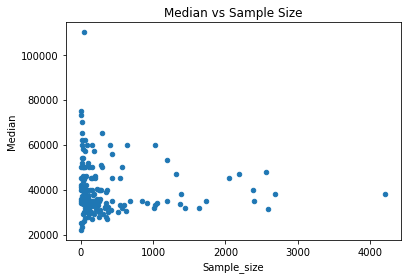

In [5]:
ax1 = recent_grads.plot(x="Sample_size", y="Median", kind="scatter", title= "Median vs Sample Size")
print(ax1)


De la gráfica anterior podemos observar varios detalles como el sample size, cuando el sample_size es mayor a 1000
(este número fue tomado arbitrariamente) se infiere que son carreras populares y esto nos ilustra que
las carreras mas populares no necesariamente generan mas dinero, podemos ver que éstas se encuentran en un rango de
28000 a 60000 USD al año, podemos ver que solamente una carrera de las mas populares alcanza los 60k USD/año. De esto
afirmamos que las carreras mas populares no son las que generan mas renta a sus egresados ya que tiene un rango de
salario bien estandarizado.

AxesSubplot(0.125,0.125;0.775x0.755)


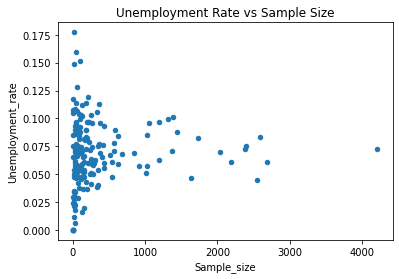

In [6]:
ax2 = recent_grads.plot(x="Sample_size", y="Unemployment_rate", kind="scatter",
                        title= "Unemployment Rate vs Sample Size")
print(ax2)


De la gráfica anterior podemos visualizar un insight bastante importante, las carreras universitarias mas populares
presentan una tasa de desempleo mas baja entre en 5 y el 10%, esto nos indica que hay un fuerte demanda por estos
profesionales, mientras no podemos inferir lo mismo de las carreras profesionales no tan populares por no tener un rango
acotado, se tiene que segmentar este grupo para observar los insight que estos nos podrían ofrecer.

AxesSubplot(0.125,0.125;0.775x0.755)


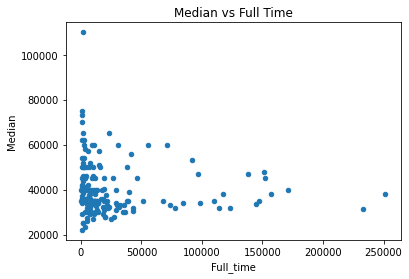

In [7]:
ax3 = recent_grads.plot(x="Full_time", y="Median", kind="scatter", title= "Median vs Full Time")
print(ax3)

Los egresados de las diferentes carreras profesionales "populares" (mayor de 50000 egresados)
que tiene un empleo full-time (+35 hrs) tiene un salario promedio de 30k a 40k USD/año aproximadamente, si vemos
carreras universitarias con una cantidad de egresados menor a 50000 existe una mayor varianza desde salarios de 20k USD
a salarios < 80k USD/año con un dato atípico de mas de 100k usd/año.

AxesSubplot(0.125,0.125;0.775x0.755)


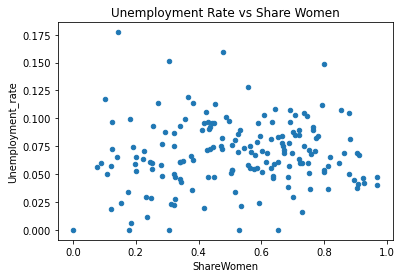

In [8]:
ax4 = recent_grads.plot(x="ShareWomen", y="Unemployment_rate", kind="scatter",
                        title= "Unemployment Rate vs Share Women")
print(ax4)

En la gráfica de "Unemployment Rate vs Share Women" no podemos establecer una relación entre las diferentes variables,
observamos una imagen bastante dispersa incapaz de poder proveeer patrones que puedan ser identificados.

AxesSubplot(0.125,0.125;0.775x0.755)


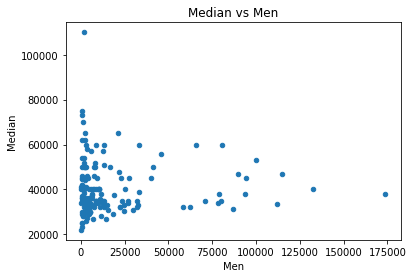

In [9]:
ax5 = recent_grads.plot(x="Men", y="Median", kind="scatter", title= "Median vs Men")
print(ax5)

AxesSubplot(0.125,0.125;0.775x0.755)


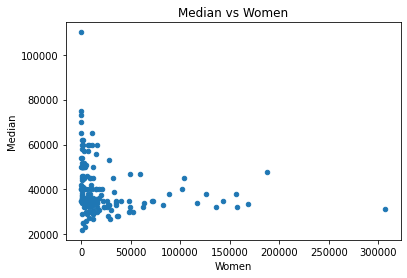

In [10]:
ax6 = recent_grads.plot(x="Women", y="Median", kind="scatter", title= "Median vs Women")
print(ax6)

De las gráficas anteriores se evidencia que las carreras que tienen mas egresados de género masculino y las carreras
que tiene una mayoría de egresados del sexo femenimo podemos determinar que en promedio tienen un salario similar, pero
también se observan diferencias, en carreras populares donde la mayoría de los egresados son mujeres tienen un salario
promedio máximo de 50k/usd aproximadamente, los del sexo masculino sin embargo pueden tener salarios máximos de
60k USD/año carreras donde son mayoría.

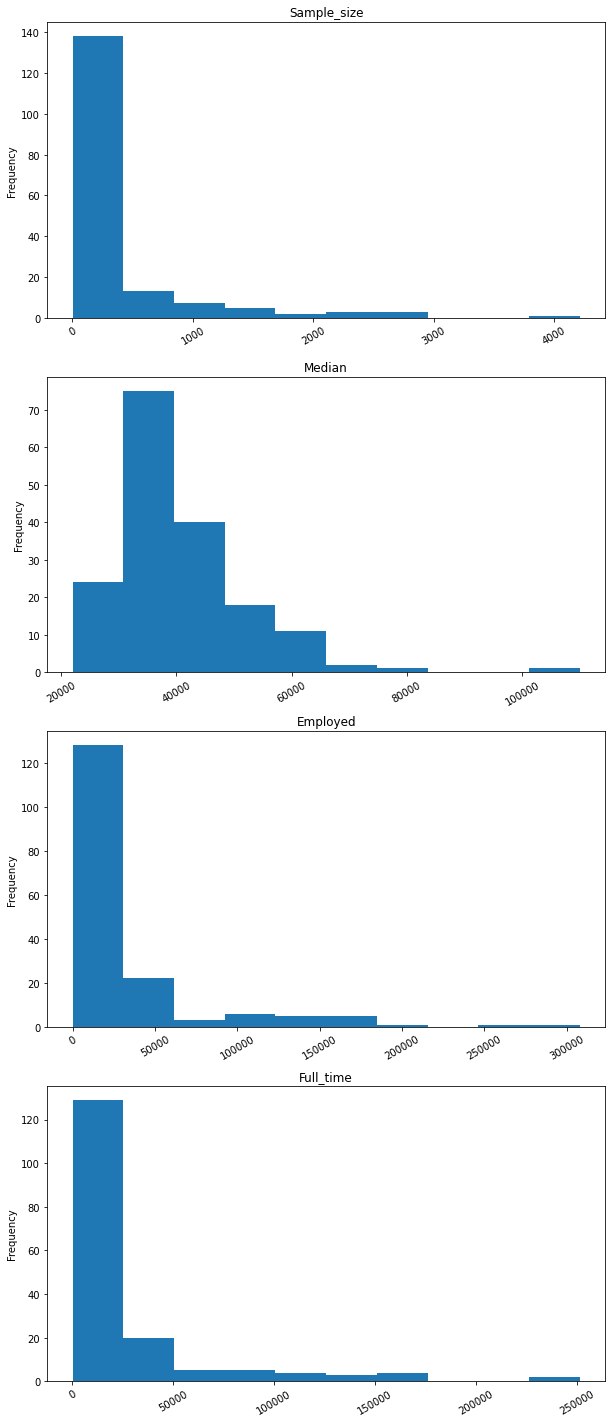

In [11]:
cols = ["Sample_size", "Median", "Employed", "Full_time", "ShareWomen", "Unemployment_rate", "Men", "Women"]
fig = plt.figure(figsize=(10,25))
for r in range(4):
    ax = fig.add_subplot(4,1,r+1)
    ax = recent_grads[cols[r]].plot(kind="hist", rot=30, title=cols[r],bins=10)

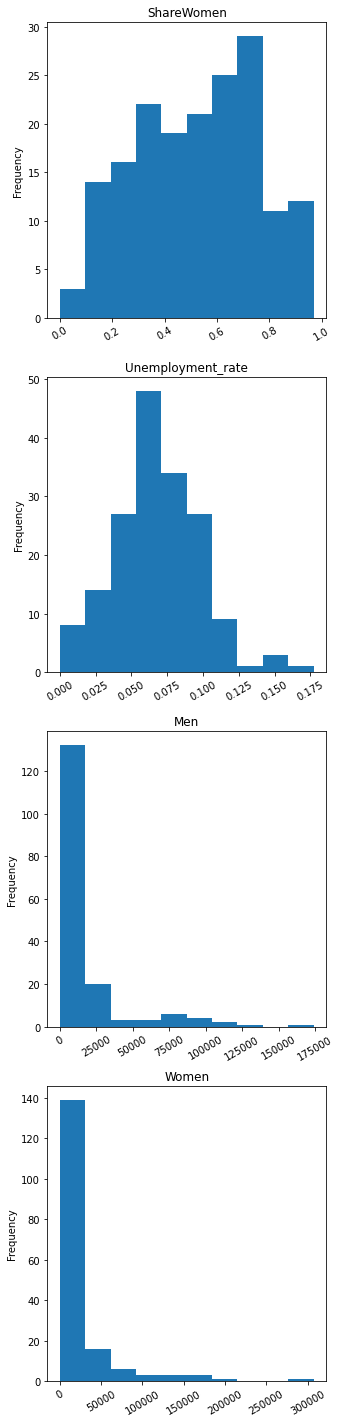

In [12]:
fig = plt.figure(figsize=(5,25))
for r in range(4,8):
    ax = fig.add_subplot(4,1,r-3)
    ax = recent_grads[cols[r]].plot(kind="hist", rot=30, title=cols[r])


En el Histograma de Median podemos ver a groso modo que el salario promedio está entre los 20 y 50k USD/año, hacia la
primera desv std podemos ver salarios de hasta 80k USD/año y hacia la segunda desv std podemos ver salarios superiores
a los 100k USD/año esto nos indica el típico resultado de una distribución asimétrica positiva.

De los histogramas de Employed y Full_time logramos ver que la mayoría de los egresados tienen un trabajo Full_time
(+ 35 hrs/semana) las distribuciones de ambos histogramas son muy parecidos asimétricas positivas ambas y con una
frecuencia muy similar.

En el histograma de ShareWomen podemos ver algo obvio que existe en cualquier muestra que indice dos posibilidades,
observamos que hay carreras donde personas del género femenino son mayoría, otras donde hay un match de 50% entre ambos
sexos y otra donde el género masculino es predominante.

Podemos encontrar en general que la tasa de desempleo para la mayoría de las carreras se encuentran entre un 4 y 8%,
este histogramo está muy cercano a una distribución normal, la mayoría de las carreras tiene alrededor de 5,5% de
desempleo. Pero como se desea acotar una banda superior e inferior (desv sts) podemos decir que entre 4 y 8% se considera
un mayor del 90% de la muestra.

Algo muy importante que logró detallar es que las mujeres en promedio tienen un salario superior que los hombres. El
género femenino tiene un salario promedio de 25k USD/año mientras que su contraparte un promedio aproximado de
25k USD/año.


# Gráfico de matriz de dispersión

Graficaremos las columnas anteriores en un solo plot para tener una mejor apreciación de los datos y así hacer fácil
a simple vista su interpretación.

array([[<AxesSubplot:xlabel='Men', ylabel='Men'>,
        <AxesSubplot:xlabel='Women', ylabel='Men'>,
        <AxesSubplot:xlabel='Median', ylabel='Men'>],
       [<AxesSubplot:xlabel='Men', ylabel='Women'>,
        <AxesSubplot:xlabel='Women', ylabel='Women'>,
        <AxesSubplot:xlabel='Median', ylabel='Women'>],
       [<AxesSubplot:xlabel='Men', ylabel='Median'>,
        <AxesSubplot:xlabel='Women', ylabel='Median'>,
        <AxesSubplot:xlabel='Median', ylabel='Median'>]], dtype=object)

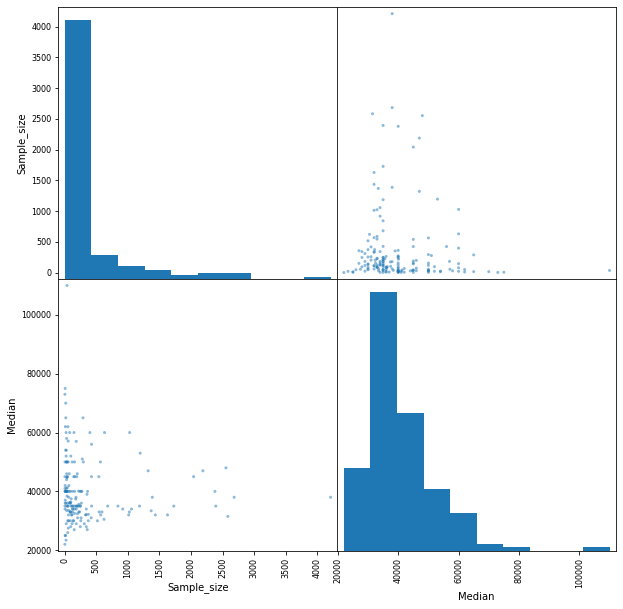

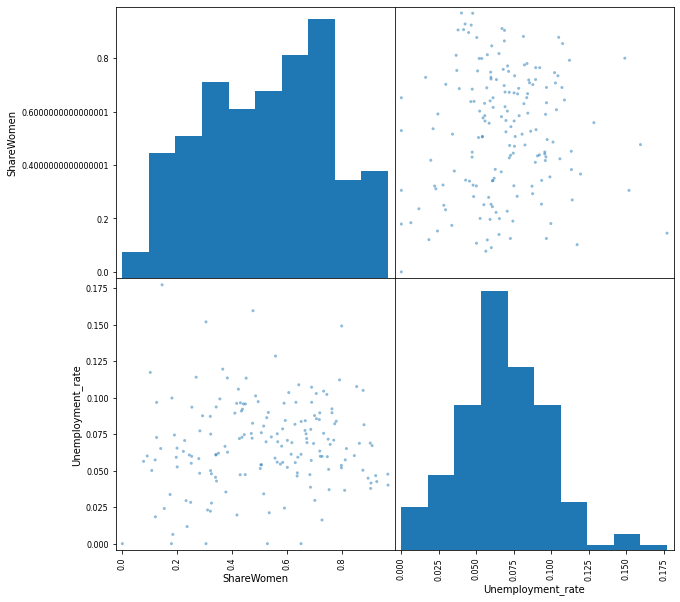

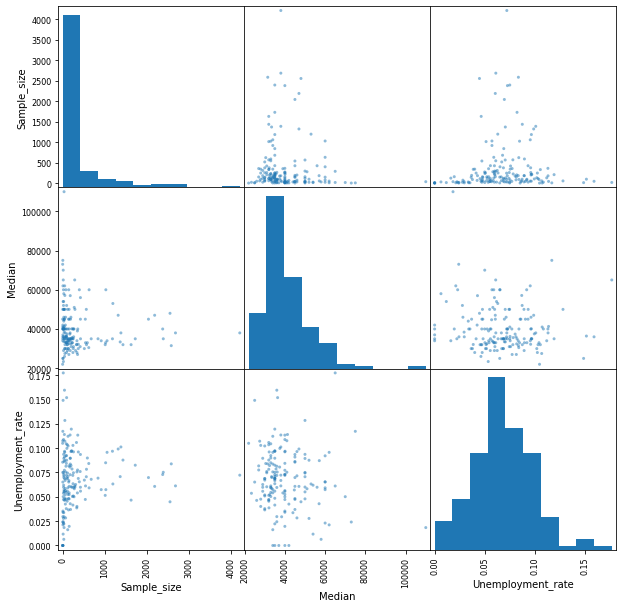

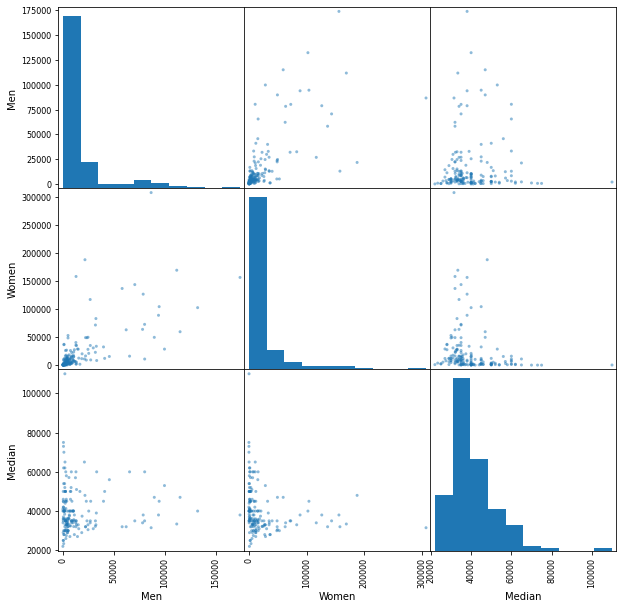

In [13]:
from pandas.plotting import scatter_matrix
scatter_matrix(recent_grads[["Sample_size", "Median"]], figsize=(10,10))
scatter_matrix(recent_grads[["ShareWomen", "Unemployment_rate"]], figsize=(10,10))
scatter_matrix(recent_grads[["Sample_size", "Median", "Unemployment_rate"]], figsize=(10,10))
scatter_matrix(recent_grads[["Men", "Women", "Median"]], figsize=(10,10))

     ShareWomen                                          Major  Median  \
164    0.968954                      EARLY CHILDHOOD EDUCATION   28000   
163    0.967998  COMMUNICATION DISORDERS SCIENCES AND SERVICES   28000   
51     0.927807                     MEDICAL ASSISTING SERVICES   42000   
138    0.923745                           ELEMENTARY EDUCATION   32000   
150    0.910933                   FAMILY AND CONSUMER SCIENCES   30000   
100    0.906677                        SPECIAL NEEDS EDUCATION   35000   
156    0.905590      HUMAN SERVICES AND COMMUNITY ORGANIZATION   30000   
151    0.904075                                    SOCIAL WORK   30000   
34     0.896019                                        NURSING   48000   
88     0.881294       MISCELLANEOUS HEALTH MEDICAL PROFESSIONS   36000   

        Total  
164   37589.0  
163   38279.0  
51    11123.0  
138  170862.0  
150   58001.0  
100   28739.0  
156    9374.0  
151   53552.0  
34   209394.0  
88    13386.0  


Text(0.5, 1.0, 'Top 10 Carreras Género Femenino')

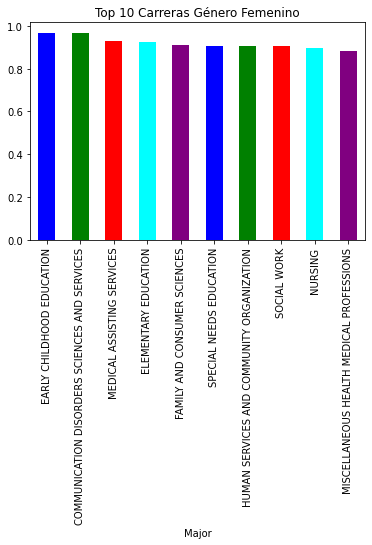

In [35]:
women_pop_careers = recent_grads.loc[recent_grads.loc[:,"ShareWomen"]>0.5,["ShareWomen", "Major", "Median", "Total"]]
top_10_women = women_pop_careers.sort_values("ShareWomen", ascending=False).head(10)
axes = top_10_women.plot.bar(x="Major", y="ShareWomen", legend=False, color=["blue","green", "red","cyan","purple"])
axes.set_title("Top 10 Carreras Género Femenino")

Text(0.5, 1.0, 'Top 10 Carreras Género Masculino')

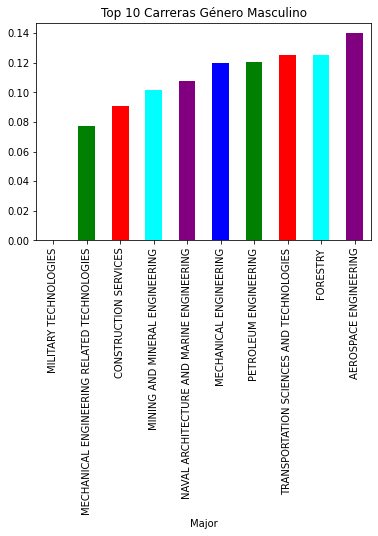

In [36]:
men_pop_careers = recent_grads.loc[recent_grads.loc[:,"ShareWomen"]<0.5,["ShareWomen", "Major", "Median", "Total"]]
top_10_men = men_pop_careers.sort_values("ShareWomen", ascending=True).head(10)
axes = top_10_men.plot.bar(x="Major", y="ShareWomen", legend=False, color=["blue","green", "red","cyan","purple"])
axes.set_title("Top 10 Carreras Género Masculino")